# Obsessed with Boba? Analyzing Bubble Tea Shops in NYC Using the Yelp Fusion API
Data Wrangling: Retrieving Bubble Tea Shops in NYC Using Yelp Fusion API

In this notebook, we use the Yelp Fusion API to read in data about Bubble Tea Shops in NYC. Additionally, we preview the data, examine the number of rows and columns, and clip only shops that are within NYC's five boroughs. This output data will be the data we use throughout the project.

In [1]:
# importing libraries
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
# from decouple import AutoConfig

C:\Users\datal\anaconda3\envs\boba-nyc\lib\site-packages\pyproj\__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
'''API only returns 1,000 results and 50 per request 
   we use the offset parameter to page through to the next 50 
   source: https://www.yelp.com/developers/faq'''

# saving yelp api key as an environment variable
API_KEY = os.environ.get('yelp_api')
# if API_KEY is None:
#     config = AutoConfig(search_path = '.')
#     API_KEY = config('YELP_API')

# empty list to place our data for each page
lst = []

# our offset parameter - each page 50 rows
offset = 0
print('initial offset number: {}'.format(offset))

# loop through the api 20 times (limit is 1000 rows with each page includes 50 rows)
for i in range(20):
    
    try:
        headers = {'Authorization': 'Bearer {}'.format(API_KEY)}
        search_api_url = 'https://api.yelp.com/v3/businesses/search'
        params = {'term': 'bubble tea', 
                  'categories': 'bubbletea, boba',
                  'location': 'New York City',
                  'offset': offset,
                  'limit': 50}

        response = requests.get(search_api_url, 
                                headers=headers, 
                                params=params, 
                                timeout=10)

        # return a dictionary
        data_dict = response.json()
        
        # convert the business dictionary to a pandas dataframe and append to list
        data = pd.DataFrame(data_dict['businesses'])
        lst.append(data)
      
        # add 50 to the offset to access a new page
        offset += 50
        print('current offset number: {}'.format(offset))
        
    except Exception as ex:
        print('exception: {}\nexit loop.'.format(ex))
        break

# concatenate all pages to one dataframe and reset index
df = pd.concat(lst)
df = df.reset_index(drop=True)

# review shape of dataframe
rows, columns = df.shape
print()
print('query includes {:,} rows and {} columns.'.format(rows, columns))
print('row id is unique: {}.'.format(df['id'].is_unique))

# review if dataframe id is unique, if not drop duplicates
if df['id'].is_unique == False:
    duplicates = df.loc[df.duplicated(subset=['id'])]
    vals = list(duplicates.head()['name'].values)
    print('\nduplicates found: {}.'.format(vals))
    
    df = df.drop_duplicates(subset=['id']).reset_index(drop=True)
    print('dropping duplicates...')
    
    rows, columns = df.shape
    print('\nrow id is unique: {}.'.format(df['id'].is_unique))
    print('query includes {:,} rows and {} columns.'.format(rows, columns))

initial offset number: 0
exception: 'businesses'
exit loop.


ValueError: No objects to concatenate

In [7]:
# preview first five rows
df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,99,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...","[delivery, pickup]",$$,"{'address1': '208 Grand St', 'address2': None,...",+16465592886,(646) 559-2886,1535.241614
1,7-bx74TooPuZKZDNW4WFcQ,chun-yang-tea-new-york,Chun Yang Tea,https://s3-media1.fl.yelpcdn.com/bphoto/JrGwrZ...,False,https://www.yelp.com/biz/chun-yang-tea-new-yor...,91,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.71617, 'longitude': -73.9971}","[delivery, pickup]",$$,"{'address1': '26B Elizabeth St', 'address2': '...",+12124200123,(212) 420-0123,1212.877370
2,3aypSFXLfkAL4dhHVFobKg,lazy-sundaes-new-york-6,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/kEfCYC...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,32,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.720597, 'longitude': -73.984539}","[delivery, pickup]",$$,"{'address1': '23 Clinton St', 'address2': None...",,,1877.016204
3,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media2.fl.yelpcdn.com/bphoto/cyFHFE...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,89,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}","[delivery, pickup]",NaN,"{'address1': '133 2nd Ave', 'address2': '', 'a...",,,2656.450427
4,zupVwJAFYkHDwrsQd2ktXA,fiftylan-union-square-new-york-3,FIFTYLAN Union Square,https://s3-media3.fl.yelpcdn.com/bphoto/UIwR20...,False,https://www.yelp.com/biz/fiftylan-union-square...,59,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.735516, 'longitude': -73.989191}","[delivery, pickup]",NaN,"{'address1': '32 Union Square E', 'address2': ...",+16467670085,(646) 767-0085,3367.900728


In [10]:
# preview last five rows
df.tail()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
547,QBebLBqhiuDlWasPgp6s4Q,tbaar-flushing-5,Tbaar,https://s3-media1.fl.yelpcdn.com/bphoto/bgao-b...,False,https://www.yelp.com/biz/tbaar-flushing-5?adju...,2,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",3.5,"{'latitude': 40.759357, 'longitude': -73.830396}","[delivery, pickup]",NaN,"{'address1': '135-52 Roosevelt Ave', 'address2...",,,15054.917573
548,7apqk24GsFC9dptoD5dDZg,uncleman-cafe-new-york,Uncleman Cafe,,False,https://www.yelp.com/biz/uncleman-cafe-new-yor...,1,"[{'alias': 'desserts', 'title': 'Desserts'}, {...",1.0,"{'latitude': 40.71781, 'longitude': -73.99795}",[],NaN,"{'address1': '122 Mulberry St', 'address2': No...",+12129666206,(212) 966-6206,1414.238245
549,Vz6hbICqQfyMWq9wzAKakw,tbaar-flushing-4,TBaar,https://s3-media1.fl.yelpcdn.com/bphoto/phUYWa...,False,https://www.yelp.com/biz/tbaar-flushing-4?adju...,6,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.0,"{'latitude': 40.7613116, 'longitude': -73.8308...",[],NaN,"{'address1': '37-11 Main St', 'address2': '', ...",,,15147.410738
550,YBgAPbviWYtVP2gAUhc7_A,t-baar-flushing,T Baar,https://s3-media4.fl.yelpcdn.com/bphoto/8pk-_Q...,False,https://www.yelp.com/biz/t-baar-flushing?adjus...,8,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",3.5,"{'latitude': 40.7587509, 'longitude': -73.830162}",[],$,"{'address1': '135-36 40th Rd', 'address2': '',...",,,15045.970192
551,f5UVQXvDpOrrIZdCjsw47w,maxins-cafe-flushing,Maxin's Cafe,https://s3-media1.fl.yelpcdn.com/bphoto/S3vWvD...,False,https://www.yelp.com/biz/maxins-cafe-flushing?...,15,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",3.5,"{'latitude': 40.7585, 'longitude': -73.83064}",[],$,"{'address1': '135-24 40th Rd', 'address2': '',...",+17188869200,(718) 886-9200,14997.842205


In [11]:
# preview column datatypes and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             552 non-null    object 
 1   alias          552 non-null    object 
 2   name           552 non-null    object 
 3   image_url      552 non-null    object 
 4   is_closed      552 non-null    bool   
 5   url            552 non-null    object 
 6   review_count   552 non-null    int64  
 7   categories     552 non-null    object 
 8   rating         552 non-null    float64
 9   coordinates    552 non-null    object 
 10  transactions   552 non-null    object 
 11  price          334 non-null    object 
 12  location       552 non-null    object 
 13  phone          552 non-null    object 
 14  display_phone  552 non-null    object 
 15  distance       552 non-null    float64
dtypes: bool(1), float64(2), int64(1), object(12)
memory usage: 65.4+ KB


In [12]:
# return count of unique values of bubble tea shops
df['name'].value_counts()

Gong Cha                   37
Kung Fu Tea                34
ViVi Bubble Tea            21
Möge Tee                   10
CoCo Fresh Tea & Juice      8
                           ..
Lil M Bubble Tea            1
Duomi Rice Yogurt House     1
Tea Makers                  1
One Cup Tea                 1
Uncle Drink                 1
Name: name, Length: 366, dtype: int64

In [13]:
# return top 20 count of unique values of bubble tea shops
df['name'].value_counts().head(20)

Gong Cha                       37
Kung Fu Tea                    34
ViVi Bubble Tea                21
Möge Tee                       10
CoCo Fresh Tea & Juice          8
Vivi Bubble Tea                 6
Coco Fresh Tea & Juice          6
Tiger Sugar                     5
Real Fruit Bubble Tea           5
Chun Yang Tea                   4
Meet Fresh                      4
Banhmigos                       4
Hawa Smoothies & Bubble Tea     4
TBaar                           4
Yaya Tea Garden                 3
Hanco's                         3
Tornado Crepe                   3
Lazy Sundaes                    3
Jupioca                         3
Mr. Wish                        3
Name: name, dtype: int64

In [17]:
# review the categories of the yelp api - make sure it's bubble tea
df['categories'][0]

[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]

In [19]:
# explode coordinates to create an individual column
gdf = pd.concat([df, df['coordinates'].apply(pd.Series)], axis=1)

# retrieve lat, lon values and return a geodataframe
gdf = gpd.GeoDataFrame(gdf, crs=4326, 
      geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))

gdf.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,latitude,longitude,geometry
0,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,99,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...","[delivery, pickup]",$$,"{'address1': '208 Grand St', 'address2': None,...",+16465592886,(646) 559-2886,1535.241614,40.719174,-73.996220,POINT (-73.99622 40.71917)
1,7-bx74TooPuZKZDNW4WFcQ,chun-yang-tea-new-york,Chun Yang Tea,https://s3-media1.fl.yelpcdn.com/bphoto/JrGwrZ...,False,https://www.yelp.com/biz/chun-yang-tea-new-yor...,91,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.71617, 'longitude': -73.9971}","[delivery, pickup]",$$,"{'address1': '26B Elizabeth St', 'address2': '...",+12124200123,(212) 420-0123,1212.877370,40.716170,-73.997100,POINT (-73.99710 40.71617)
2,3aypSFXLfkAL4dhHVFobKg,lazy-sundaes-new-york-6,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/kEfCYC...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,32,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.720597, 'longitude': -73.984539}","[delivery, pickup]",$$,"{'address1': '23 Clinton St', 'address2': None...",,,1877.016204,40.720597,-73.984539,POINT (-73.98454 40.72060)
3,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media2.fl.yelpcdn.com/bphoto/cyFHFE...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,89,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}","[delivery, pickup]",NaN,"{'address1': '133 2nd Ave', 'address2': '', 'a...",,,2656.450427,40.728800,-73.987750,POINT (-73.98775 40.72880)
4,zupVwJAFYkHDwrsQd2ktXA,fiftylan-union-square-new-york-3,FIFTYLAN Union Square,https://s3-media3.fl.yelpcdn.com/bphoto/UIwR20...,False,https://www.yelp.com/biz/fiftylan-union-square...,59,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.735516, 'longitude': -73.989191}","[delivery, pickup]",NaN,"{'address1': '32 Union Square E', 'address2': ...",+16467670085,(646) 767-0085,3367.900728,40.735516,-73.989191,POINT (-73.98919 40.73552)


In [20]:
# read in boroughs shapefile to return only bubble tea shops within nyc
url = 'https://data.cityofnewyork.us/api/geospatial/tqmj-j8zm?method=export&format=Shapefile'
boro_gdf = gpd.read_file(url)

boro_gdf.head()

,boro_code,boro_name,shape_area,shape_leng,geometry
0,1.0,Manhattan,6.366208e+08,359993.127161,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
1,2.0,Bronx,1.187194e+09,463868.935588,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
2,3.0,Brooklyn,1.934174e+09,728195.194837,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
3,5.0,Staten Island,1.623631e+09,325924.002252,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
4,4.0,Queens,3.040206e+09,900269.281914,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


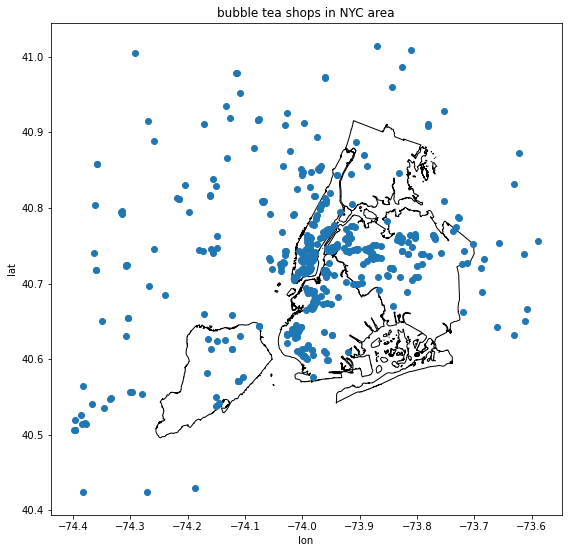

In [22]:
# plot bubble tea shops and boroughs
fig, ax = plt.subplots(figsize=(8, 8))

gdf.plot(ax=ax)
boro_gdf.plot(ax=ax, facecolor='None', edgecolor='black', zorder=0)

plt.title('bubble tea shops in NYC area')
plt.xlabel('lon')
plt.ylabel('lat')
plt.tight_layout()

In [38]:
# clip bubble tea shops that are within the five boroughs
gdf = gpd.clip(gdf, boro_gdf)
gdf = gdf.reset_index(drop=True)

rows, columns = gdf.shape
print('number of rows: {}\n\
number of columns: {}'.format(rows, columns))

number of rows: 413
number of columns: 19


In [39]:
# preview dataframe
gdf.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,latitude,longitude,geometry
0,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,99,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...","[delivery, pickup]",$$,"{'address1': '208 Grand St', 'address2': None,...",+16465592886,(646) 559-2886,1535.241614,40.719174,-73.996220,POINT (-73.99622 40.71917)
1,7-bx74TooPuZKZDNW4WFcQ,chun-yang-tea-new-york,Chun Yang Tea,https://s3-media1.fl.yelpcdn.com/bphoto/JrGwrZ...,False,https://www.yelp.com/biz/chun-yang-tea-new-yor...,91,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.71617, 'longitude': -73.9971}","[delivery, pickup]",$$,"{'address1': '26B Elizabeth St', 'address2': '...",+12124200123,(212) 420-0123,1212.877370,40.716170,-73.997100,POINT (-73.99710 40.71617)
2,3aypSFXLfkAL4dhHVFobKg,lazy-sundaes-new-york-6,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/kEfCYC...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,32,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.720597, 'longitude': -73.984539}","[delivery, pickup]",$$,"{'address1': '23 Clinton St', 'address2': None...",,,1877.016204,40.720597,-73.984539,POINT (-73.98454 40.72060)
3,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media2.fl.yelpcdn.com/bphoto/cyFHFE...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,89,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}","[delivery, pickup]",NaN,"{'address1': '133 2nd Ave', 'address2': '', 'a...",,,2656.450427,40.728800,-73.987750,POINT (-73.98775 40.72880)
4,zupVwJAFYkHDwrsQd2ktXA,fiftylan-union-square-new-york-3,FIFTYLAN Union Square,https://s3-media3.fl.yelpcdn.com/bphoto/UIwR20...,False,https://www.yelp.com/biz/fiftylan-union-square...,59,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.735516, 'longitude': -73.989191}","[delivery, pickup]",NaN,"{'address1': '32 Union Square E', 'address2': ...",+16467670085,(646) 767-0085,3367.900728,40.735516,-73.989191,POINT (-73.98919 40.73552)


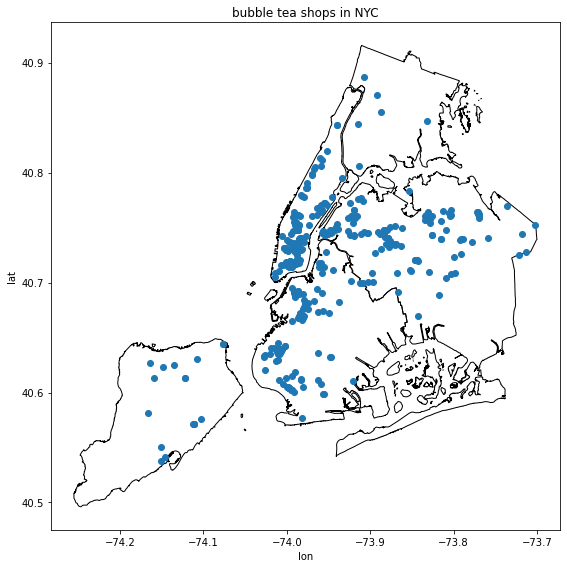

In [40]:
fig, ax = plt.subplots(figsize=(8, 8))

gdf.plot(ax=ax)
boro_gdf.plot(ax=ax, facecolor='None', edgecolor='black', zorder=0)

plt.title('bubble tea shops in NYC')
plt.xlabel('lon')
plt.ylabel('lat')
plt.tight_layout()

In [33]:
# # save file
# gdf.to_csv('boba-nyc.csv', index=False)

In [34]:
# # sanity check
# pd.read_csv('boba-nyc.csv').head()